### This notebook presents code that aims to predict whether it will rain tomorrow 

The dataset can be found at: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

In [1]:
#imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
rainFall_df=pd.read_csv('weatherAUS.csv')

In [3]:
rainFall_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Exploratory Data Analysis 

In [4]:
rainFall_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
rainFall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
rainFall_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
rainFall_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
oiginal_rows=rainFall_df.shape[0]

In [9]:
#drop rows where RainTomorrow=null

rainFall_df=rainFall_df[rainFall_df['RainTomorrow'].notna()]
rowsDropped=(oiginal_rows-rainFall_df.shape[0])
print(rowsDropped) #matches number of null rows in RainTomorrow

3267


In [11]:
#create a new df with NA sums, so we can decide which columns to drop
na_df=(rainFall_df.isna().sum()).to_frame()

In [12]:
na_df

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [13]:
na_df=na_df.drop(['Date','Location','RainTomorrow'])
na_df.rename(columns={0:'N/A Count'}, inplace=True)
na_df

,N/A Count
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013
WindDir3pm,3778
WindSpeed9am,1348


<AxesSubplot:>

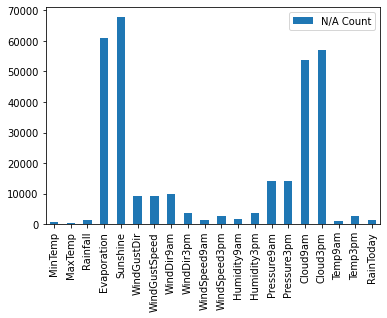

In [14]:
na_df.plot.bar()

In [15]:
#as we see in the bar chart, the evaporation, sunshine, cloud9am, and cloud3pm columns are mainly N/A so we can remove them 
rainFall_df=rainFall_df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
rainFall_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [16]:
#data cleaning 
#new data for only numerical data 
df_numerical=rainFall_df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],axis=1)
df_numerical.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


In [17]:
df_numerical.fillna(df_numerical.mean(),inplace=True)
df_numerical.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [18]:
df_categorical=rainFall_df[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location']]
df_categorical.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Date,Location
0,W,W,WNW,No,No,2008-12-01,Albury
1,WNW,NNW,WSW,No,No,2008-12-02,Albury
2,WSW,W,WSW,No,No,2008-12-03,Albury
3,NE,SE,E,No,No,2008-12-04,Albury
4,W,ENE,NW,No,No,2008-12-05,Albury


In [19]:
df_categorical.fillna('Unknown',inplace=True)
df_categorical.isna().sum()

c:\python37\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
Date            0
Location        0
dtype: int64

In [20]:
rainFall_df_cleaned=df_categorical.join(df_numerical)
rainFall_df_cleaned.isna().sum()

WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [66]:
#change categorical value

In [21]:
#columns we need to transform 
#list of columsn to transform 
cat_list=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for c in cat_list:
    rainFall_df_cleaned[c]=rainFall_df_cleaned[c].astype('category')
    new_col=c+'_Cat'
    rainFall_df_cleaned[new_col] = rainFall_df_cleaned[c].cat.codes
    

In [22]:
rainFall_df_cleaned.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustDir_Cat,WindDir9am_Cat,WindDir3pm_Cat,RainToday_Cat,RainTomorrow_Cat
0,W,W,WNW,No,No,2008-12-01,Albury,13.4,22.9,0.6,...,22.0,1007.7,1007.1,16.9,21.8,14,14,15,0,0
1,WNW,NNW,WSW,No,No,2008-12-02,Albury,7.4,25.1,0.0,...,25.0,1010.6,1007.8,17.2,24.3,15,6,16,0,0
2,WSW,W,WSW,No,No,2008-12-03,Albury,12.9,25.7,0.0,...,30.0,1007.6,1008.7,21.0,23.2,16,14,16,0,0
3,NE,SE,E,No,No,2008-12-04,Albury,9.2,28.0,0.0,...,16.0,1017.6,1012.8,18.1,26.5,4,9,0,0,0
4,W,ENE,NW,No,No,2008-12-05,Albury,17.5,32.3,1.0,...,33.0,1010.8,1006.0,17.8,29.7,14,1,7,0,0


In [23]:
rainFall_df_cleaned.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],axis=1)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,WindGustDir_Cat,WindDir9am_Cat,WindDir3pm_Cat,RainToday_Cat,RainTomorrow_Cat
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,14,14,15,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,15,6,16,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,16,14,16,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,4,9,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,14,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,2,0,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,9,1,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,6,9,3,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,3,9,15,0,0


<AxesSubplot:>

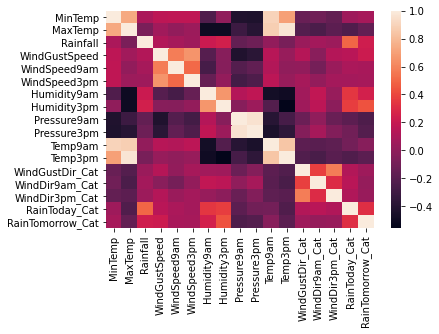

In [24]:
#view correlation graph
import seaborn as sns
corr = rainFall_df_cleaned.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)